In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("Power_Plant_3845005786177023144.csv")
df.describe()

,OBJECTID,Retired Plant,Capacity_Latest,CEC_Jurisdictional,x,y
count,1996.000000,1996.000000,1977.000000,1920.000000,1996.000000,1996.000000
mean,2863.143788,0.128257,62.355008,0.045312,-119.183331,36.005217
std,577.153803,0.334459,219.874216,0.208043,2.728449,2.205080
min,1865.000000,0.000000,0.000000,0.000000,-124.208589,32.549548
25%,2363.750000,0.000000,1.500000,0.000000,-121.256145,34.107144
50%,2862.500000,0.000000,8.400000,0.000000,-119.023569,35.408837
75%,3362.250000,0.000000,45.000000,0.000000,-117.733794,37.791444
max,3865.000000,1.000000,5664.000000,1.000000,-80.982082,43.371078


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            1996 non-null   int64  
 1   CECPlantID          1996 non-null   object 
 2   PlantName           1920 non-null   object 
 3   Retired Plant       1996 non-null   int64  
 4   Operator Company    1920 non-null   object 
 5   County              1992 non-null   object 
 6   Capacity_Latest     1977 non-null   float64
 7   Units               1992 non-null   object 
 8   PriEnergySource     1992 non-null   object 
 9   StartDate           1801 non-null   object 
 10  CEC_Jurisdictional  1920 non-null   float64
 11  x                   1996 non-null   float64
 12  y                   1996 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 202.8+ KB


,OBJECTID,CECPlantID,PlantName,Retired Plant,Operator Company,County,Capacity_Latest,Units,PriEnergySource,StartDate,CEC_Jurisdictional,x,y
0,1865,S0335,Corcoran 2 Solar LLC CED,0,RWE Clean Energy,Kings,19.8,1,SUN,6/10/2015 12:00:00 AM,0.0,-119.567893,36.137170
1,1866,S0520,Corcoran 3 Solar,0,RWE Clean Energy,Kings,20.0,Unit 1,SUN,2/11/2016 12:00:00 AM,0.0,-119.579712,36.144319
2,1867,C0007,Hanford - Retired October 2011,1,Hanford LP,Kings,24.0,GEN 1,PC,9/1/1990 12:00:00 AM,0.0,-119.648391,36.269640
3,1868,G0832,Hanford Energy Park Peaker,0,"MRP San Joaquin Energy, LLC",Kings,92.0,"1, 2",NG,9/1/2001 12:00:00 AM,1.0,-119.647437,36.270308
4,1869,S0608,Exeter Solar,0,Altus Power,Tulare,3.5,ES,SUN,2/12/2014 12:00:00 AM,0.0,-119.128325,36.266298


In [5]:
df.isnull().sum()

OBJECTID                0
CECPlantID              0
PlantName              76
Retired Plant           0
Operator Company       76
County                  4
Capacity_Latest        19
Units                   4
PriEnergySource         4
StartDate             195
CEC_Jurisdictional     76
x                       0
y                       0
dtype: int64

In [14]:
a=df['Operator Company'] = df['Operator Company'].fillna('Unknown')
a
b=df['StartDate'] = df['StartDate'].fillna('Unknown')
b
def parse_date(date):
    try:
        return pd.to_datetime(date, errors='coerce')
    except:
        return pd.NaT

c=df['StartDate'] = df['StartDate'].apply(parse_date)
c
d=df['Capacity_Latest'] = pd.to_numeric(df['Capacity_Latest'], errors='coerce')
d
e=df['Capacity_Latest'] = df['Capacity_Latest'].fillna(0)
e
f=df['PriEnergySource'] = df['PriEnergySource'].str.upper().str.strip()
f
g=df['County'] = df['County'].str.title().str.strip()
g
h=duplicates = df.duplicated(subset=['CECPlantID']).sum()
h
df1 = df.drop_duplicates(subset=['CECPlantID'], keep='first')
df1.info()
df1.to_csv("cleaned data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 1995
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OBJECTID            1994 non-null   int64         
 1   CECPlantID          1994 non-null   object        
 2   PlantName           1919 non-null   object        
 3   Retired Plant       1994 non-null   int64         
 4   Operator Company    1994 non-null   object        
 5   County              1990 non-null   object        
 6   Capacity_Latest     1994 non-null   float64       
 7   Units               1990 non-null   object        
 8   PriEnergySource     1990 non-null   object        
 9   StartDate           1801 non-null   datetime64[ns]
 10  CEC_Jurisdictional  1919 non-null   float64       
 11  x                   1994 non-null   float64       
 12  y                   1994 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)

In [15]:
df2 = pd.read_csv("cleaned data.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            1994 non-null   int64  
 1   CECPlantID          1994 non-null   object 
 2   PlantName           1919 non-null   object 
 3   Retired Plant       1994 non-null   int64  
 4   Operator Company    1994 non-null   object 
 5   County              1990 non-null   object 
 6   Capacity_Latest     1994 non-null   float64
 7   Units               1990 non-null   object 
 8   PriEnergySource     1990 non-null   object 
 9   StartDate           1801 non-null   object 
 10  CEC_Jurisdictional  1919 non-null   float64
 11  x                   1994 non-null   float64
 12  y                   1994 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 202.6+ KB


In [17]:
energy_counts = df['PriEnergySource'].value_counts()
energy_counts

PriEnergySource
SUN    925
NG     357
WAT    298
WND    161
LFG     73
GEO     49
WDS     36
OBG     32
BAT     12
PC       9
BIT      8
DFO      6
OIL      4
OGW      4
MSW      3
WH       3
NUC      2
AB       2
BLQ      1
JF       1
UNK      1
OBS      1
GAS      1
OG       1
SUB      1
OTH      1
Name: count, dtype: int64

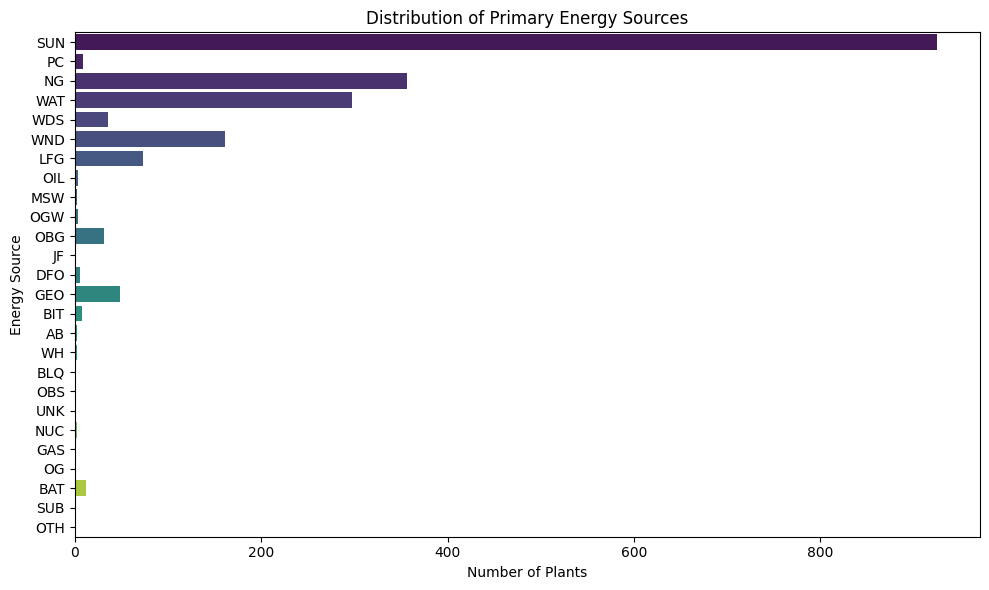

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(y='PriEnergySource', hue='PriEnergySource', data=df, palette='viridis', legend=False)
plt.title('Distribution of Primary Energy Sources')
plt.xlabel('Number of Plants')
plt.ylabel('Energy Source')
plt.tight_layout()
plt.savefig('energy_source_distribution.png')
plt.show()

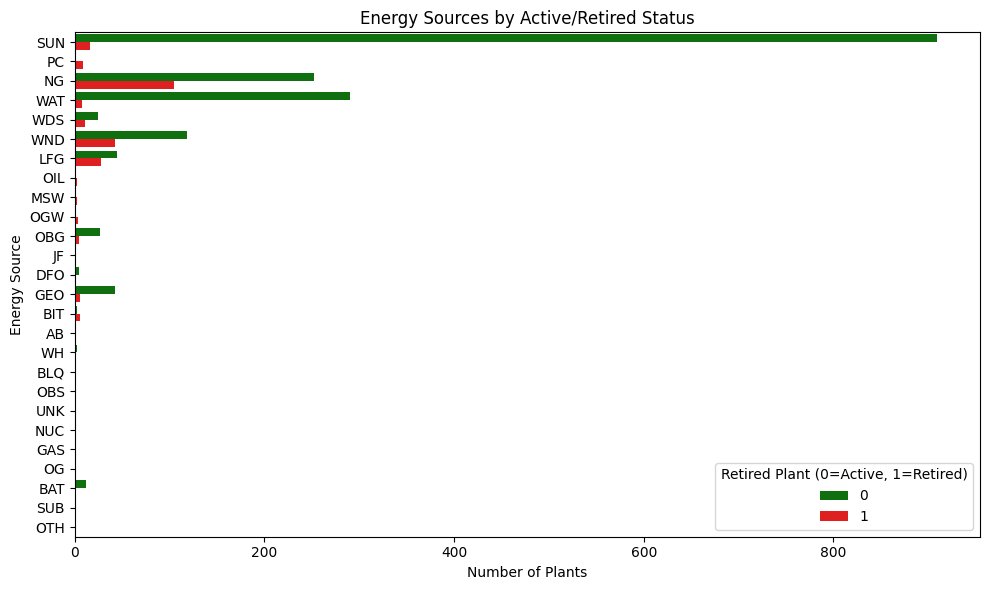

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y='PriEnergySource', hue='Retired Plant', data=df, palette={0: 'green', 1: 'red'})
plt.title('Energy Sources by Active/Retired Status')
plt.xlabel('Number of Plants')
plt.ylabel('Energy Source')
plt.legend(title='Retired Plant (0=Active, 1=Retired)')
plt.tight_layout()
plt.savefig('energy_source_retired_status.png')
plt.show()

In [26]:
solar_count = energy_counts.get('SUN', 0)
ng_count = energy_counts.get('NG', 0)
other_count = energy_counts.sum() - solar_count - ng_count
print(f"Solar Plants: {solar_count}")
print(f"Natural Gas Plants: {ng_count}")
print(f"Other Plants: {other_count}")

Solar Plants: 925
Natural Gas Plants: 357
Other Plants: 710


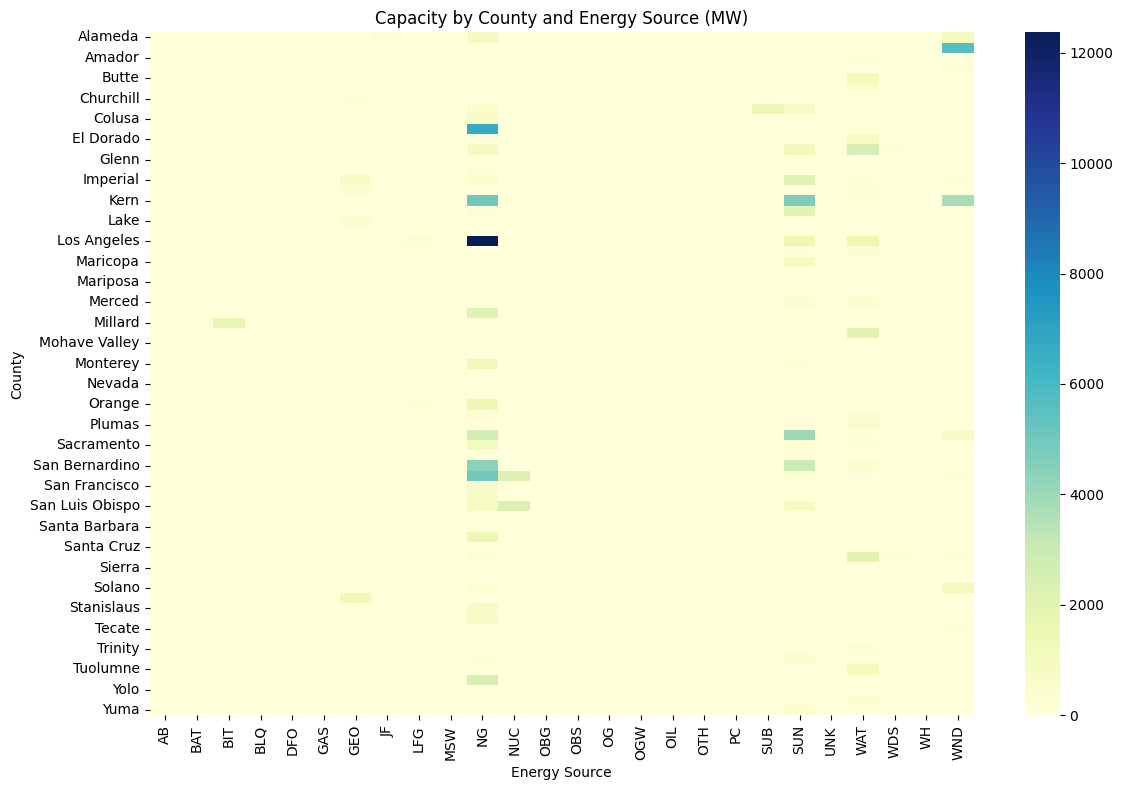

In [29]:
capacity_by_county_energy = df.pivot_table(values='Capacity_Latest', index='County', columns='PriEnergySource', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(capacity_by_county_energy, cmap='YlGnBu', annot=False)
plt.title('Capacity by County and Energy Source (MW)')
plt.xlabel('Energy Source')
plt.ylabel('County')
plt.tight_layout()
plt.savefig('capacity_heatmap.png')
plt.show()

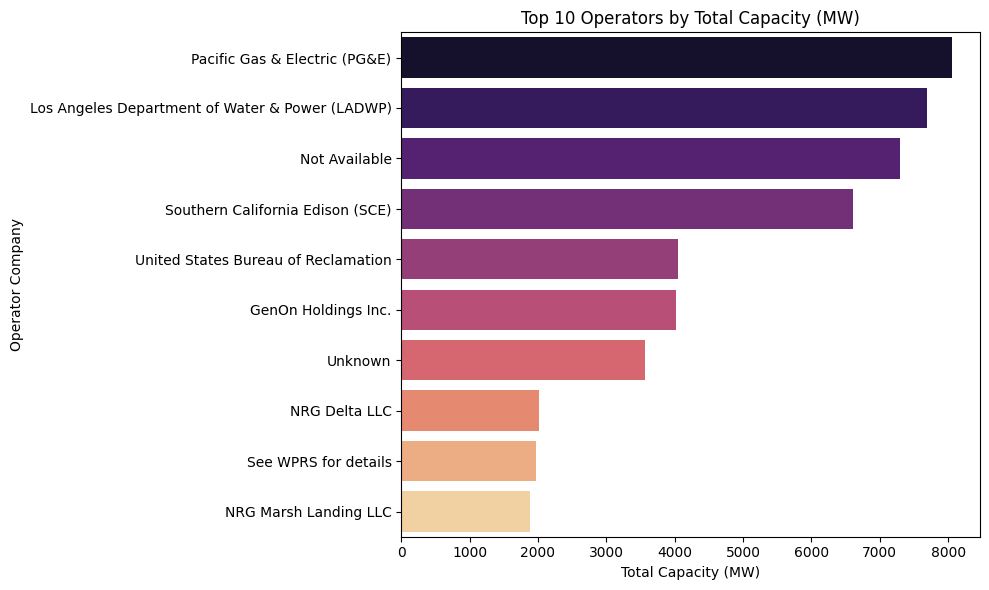

In [30]:
operator_capacity = df.groupby('Operator Company')['Capacity_Latest'].sum().sort_values(ascending=False).head(10)
operator_capacity_df = pd.DataFrame({'Operator Company': operator_capacity.index, 'Total Capacity': operator_capacity.values})
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Capacity', y='Operator Company', hue='Operator Company', data=operator_capacity_df, palette='magma', legend=False)
plt.title('Top 10 Operators by Total Capacity (MW)')
plt.xlabel('Total Capacity (MW)')
plt.ylabel('Operator Company')
plt.tight_layout()
plt.savefig('top_operators_capacity.png')
plt.show()

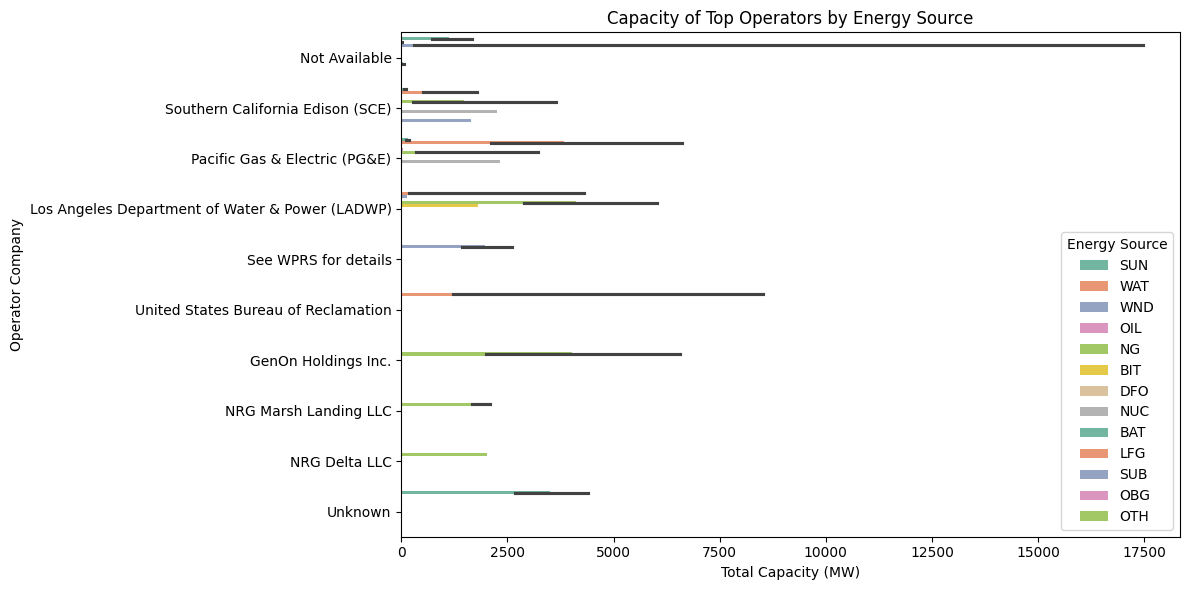

In [31]:
top_operators = operator_capacity.index
top_operator_df = df[df['Operator Company'].isin(top_operators)]
plt.figure(figsize=(12, 6))
sns.barplot(x='Capacity_Latest', y='Operator Company', hue='PriEnergySource', data=top_operator_df, palette='Set2', estimator=sum)
plt.title('Capacity of Top Operators by Energy Source')
plt.xlabel('Total Capacity (MW)')
plt.ylabel('Operator Company')
plt.legend(title='Energy Source')
plt.tight_layout()
plt.savefig('top_operators_by_energy.png')
plt.show()

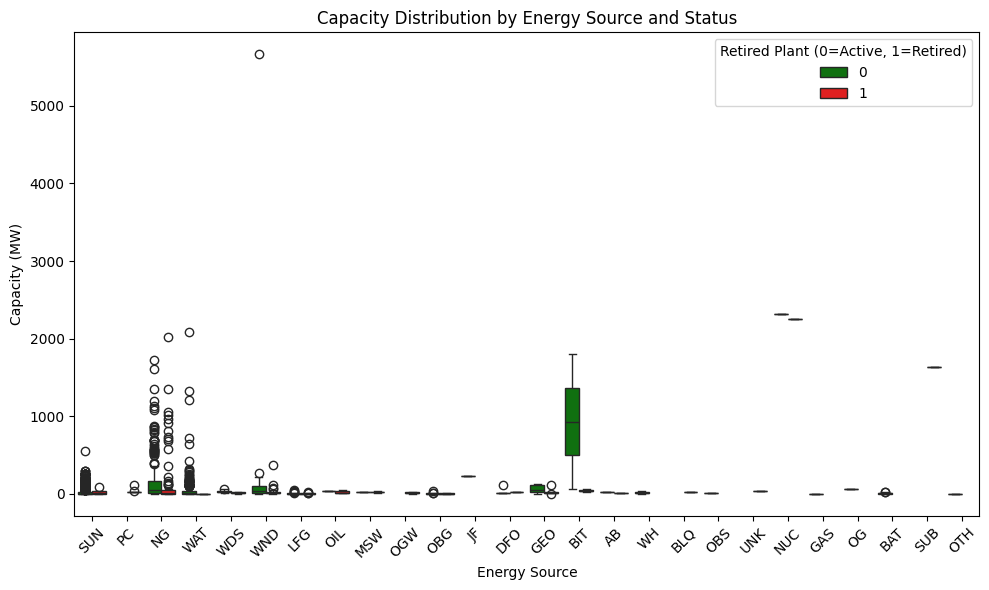

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PriEnergySource', y='Capacity_Latest', hue='Retired Plant', data=df, palette={0: 'green', 1: 'red'})
plt.title('Capacity Distribution by Energy Source and Status')
plt.xlabel('Energy Source')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45)
plt.legend(title='Retired Plant (0=Active, 1=Retired)')
plt.tight_layout()
plt.savefig('capacity_boxplot.png')
plt.show()

In [36]:
high_capacity_counties = df.groupby('County')['Capacity_Latest'].sum().sort_values(ascending=False)
high_capacity_counties.head(10)

County
Los Angeles        15995.99
Kern               13737.34
San Bernardino      8036.53
San Diego           7759.45
Riverside           7731.45
Contra Costa        6827.44
All                 5756.00
Fresno              4844.34
San Luis Obispo     4202.65
Imperial            3907.39
Name: Capacity_Latest, dtype: float64

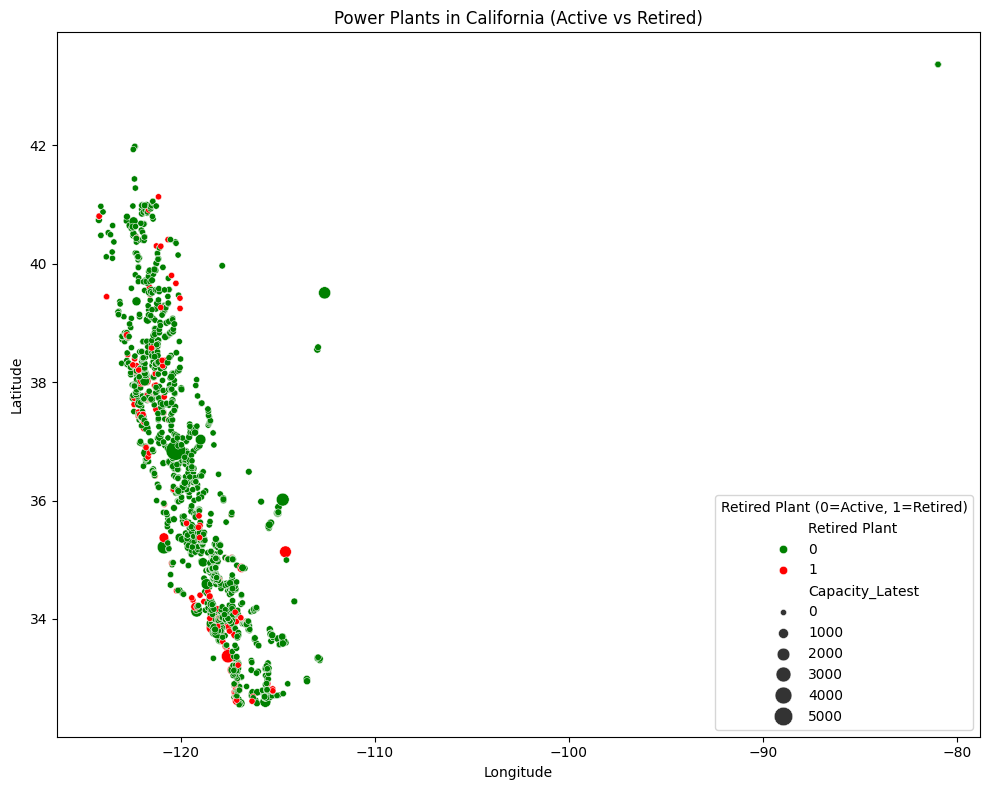

In [37]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='Retired Plant', size='Capacity_Latest', data=df, palette={0: 'green', 1: 'red'}, sizes=(20, 200))
plt.title('Power Plants in California (Active vs Retired)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Retired Plant (0=Active, 1=Retired)')
plt.tight_layout()
plt.savefig('geospatial_map_retired.png')
plt.show()

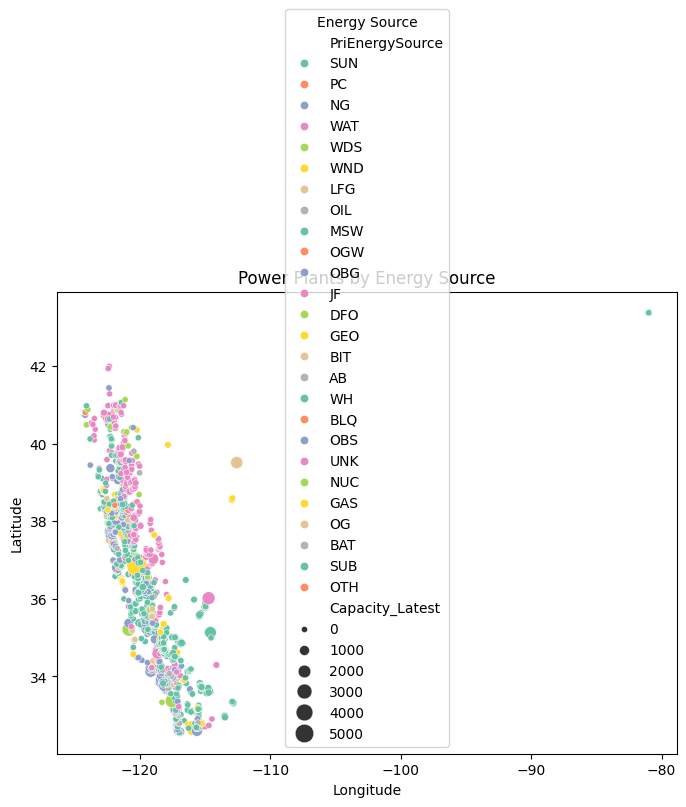

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='PriEnergySource', size='Capacity_Latest', data=df, palette='Set2', sizes=(20, 200))
plt.title('Power Plants by Energy Source')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Energy Source')
plt.savefig('geospatial_map_energy.png')
plt.show()

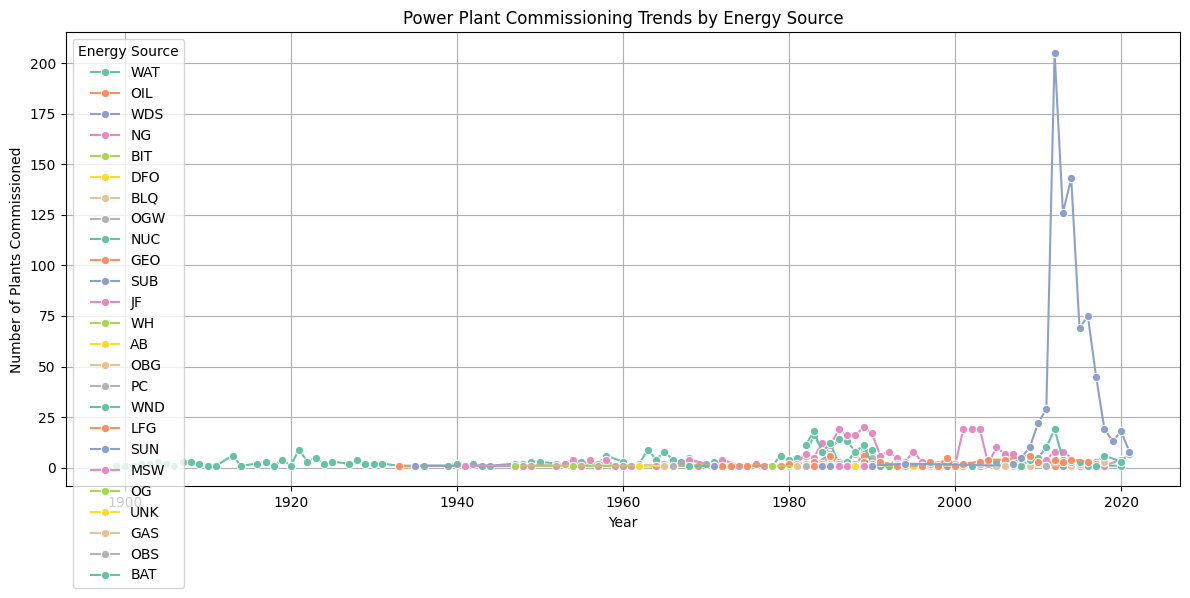

In [43]:
df['Year'] = pd.to_datetime(df['StartDate'], errors='coerce').dt.year
yearly_counts = df.groupby(['Year', 'PriEnergySource']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', hue='PriEnergySource', data=yearly_counts, marker='o', palette='Set2')
plt.title('Power Plant Commissioning Trends by Energy Source')
plt.xlabel('Year')
plt.ylabel('Number of Plants Commissioned')
plt.legend(title='Energy Source')
plt.grid(True)
plt.tight_layout()
plt.savefig('commissioning_trends.png')
plt.show()

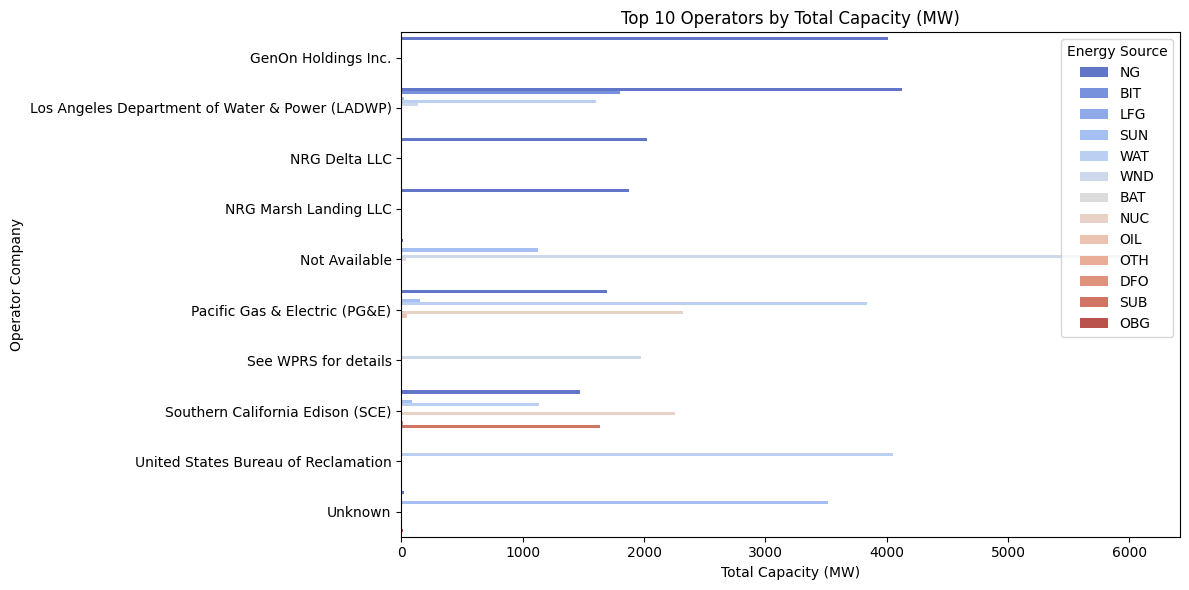

In [53]:
operator_stats = df.groupby(['Operator Company', 'PriEnergySource'])['Capacity_Latest'].agg(['sum', 'mean']).reset_index()
operator_stats.columns = ['Operator Company', 'PriEnergySource', 'Total Capacity', 'Average Capacity']
top_operators = df.groupby('Operator Company')['Capacity_Latest'].sum().sort_values(ascending=False).head(10).index
top_operator_stats = operator_stats[operator_stats['Operator Company'].isin(top_operators)]
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Capacity', y='Operator Company', hue='PriEnergySource', data=top_operator_stats, palette='coolwarm')
plt.title('Top 10 Operators by Total Capacity (MW)')
plt.xlabel('Total Capacity (MW)')
plt.ylabel('Operator Company')
plt.legend(title='Energy Source')
plt.tight_layout()
plt.savefig('operator_total_capacity.png')
plt.show()

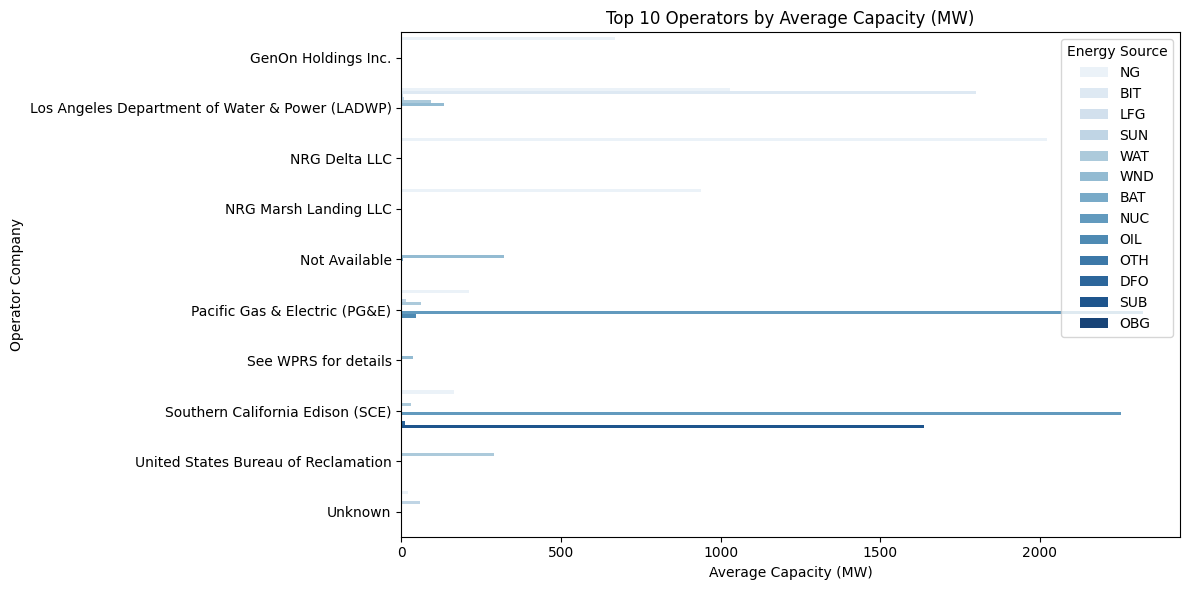

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Capacity', y='Operator Company', hue='PriEnergySource', data=top_operator_stats, palette='Blues')
plt.title('Top 10 Operators by Average Capacity (MW)')
plt.xlabel('Average Capacity (MW)')
plt.ylabel('Operator Company')
plt.legend(title='Energy Source')
plt.tight_layout()
plt.savefig('operator_avg_capacity.png')
plt.show()

In [46]:
dfx=df.groupby('Operator Company')['Capacity_Latest'].sum().sort_values(ascending=False)
dfx.head(10)

Operator Company
Pacific Gas & Electric (PG&E)                      8062.90
Los Angeles Department of Water & Power (LADWP)    7687.25
Not Available                                      7291.68
Southern California Edison (SCE)                   6604.94
United States Bureau of Reclamation                4054.65
GenOn Holdings Inc.                                4012.49
Unknown                                            3561.11
NRG Delta LLC                                      2022.00
See WPRS for details                               1977.31
NRG Marsh Landing LLC                              1877.09
Name: Capacity_Latest, dtype: float64

In [47]:
retired_plants = df[df['Retired Plant'] == 1]
retired_plants

,OBJECTID,CECPlantID,PlantName,Retired Plant,Operator Company,County,Capacity_Latest,Units,PriEnergySource,StartDate,CEC_Jurisdictional,x,y,Year
2,1867,C0007,Hanford - Retired October 2011,1,Hanford LP,Kings,24.0,GEN 1,PC,1990-09-01,0.0,-119.648391,36.269640,1990.0
15,1880,E0089,Soledad Energy - Retired Jan 2006,1,Soledad Energy LLC,Monterey,13.4,BBC 13.4,WDS,2000-07-15,0.0,-121.315597,36.416289,2000.0
85,1950,G0589,Sunnyside Cogeneration Partners LP (Retired De...,1,Ridgewood Power Management LLC,Monterey,6.5,Gen 1-5,NG,1991-05-01,0.0,-121.674816,36.736479,1991.0
86,1951,E0144,Salinas - Closed August 2009,1,Pacific Recovery Corp,Monterey,1.5,1,LFG,1986-12-01,0.0,-121.615594,36.801813,1986.0
120,1985,G0661,Watsonville - (Non-Operational May 2011),1,Calpine Monterey Cogeneration Inc,Santa Cruz,30.8,"WV1JT1, WV1ST1",NG,1990-05-01,0.0,-121.768679,36.911320,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,3832,H0461,Santa Ana 2 (Non-operational),1,Southern California Edison (SCE),San Bernardino,0.0,"1, 2",WAT,NaT,0.0,-117.186898,34.113490,NaN
1965,3834,H0571,U-S Wolf Creek (Less than 1MW),1,Nevada Irrigation District,Nevada,0.0,1,WAT,NaT,0.0,-121.020179,39.262313,NaN
1969,3838,S0371,SCE - Isis,1,Not Available,Kern,0.0,1,SUN,NaT,0.0,-119.692876,35.616149,NaN
1970,3839,S0456,Kern Solar Ranch,1,Algonquin Power Sanger LLC,Kern,0.0,NaN,NaN,NaT,0.0,-119.692768,35.616149,NaN


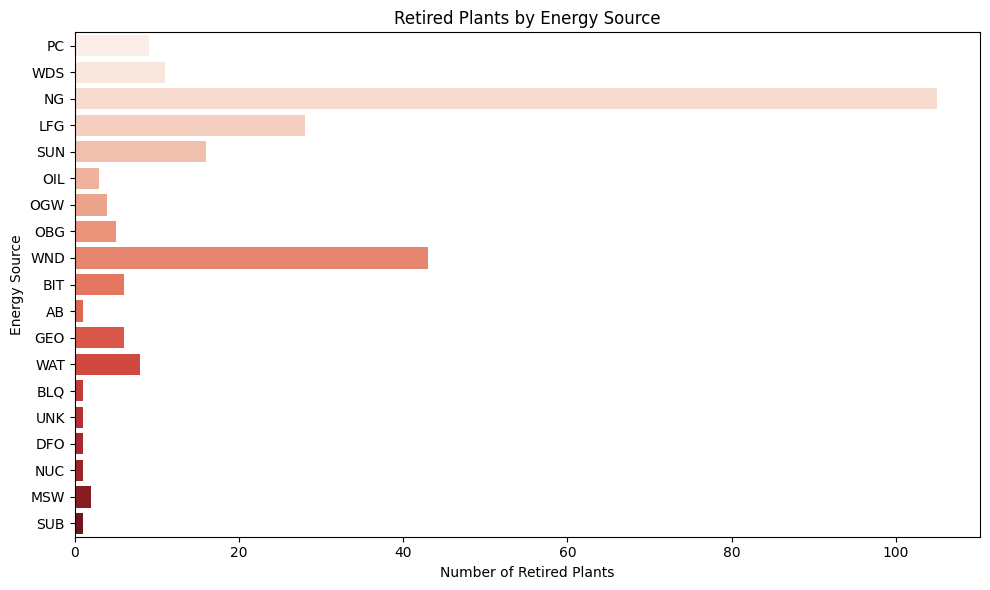

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(y='PriEnergySource', hue='PriEnergySource', data=retired_plants, palette='Reds', legend=False)
plt.title('Retired Plants by Energy Source')
plt.xlabel('Number of Retired Plants')
plt.ylabel('Energy Source')
plt.tight_layout()
plt.savefig('retired_energy_distribution.png')
plt.show()

In [55]:
retired_plants1 = pd.to_datetime(retired_plants['StartDate'], errors='coerce')
retired_plants2 = (pd.to_datetime('2025-04-16') - retired_plants['StartDate']).dt.days / 365.25
lifespan_by_energy = retired_plants.groupby('PriEnergySource')['Lifespan'].mean().reset_index()
retired_plants1
retired_plants2
lifespan_by_energy

,PriEnergySource,Lifespan
0,AB,44.041068
1,BIT,41.789642
2,BLQ,59.958932
3,DFO,63.288159
4,GEO,39.239973
5,LFG,30.348392
6,MSW,38.113621
7,NG,41.949576
8,NUC,57.289528
9,OBG,26.439425


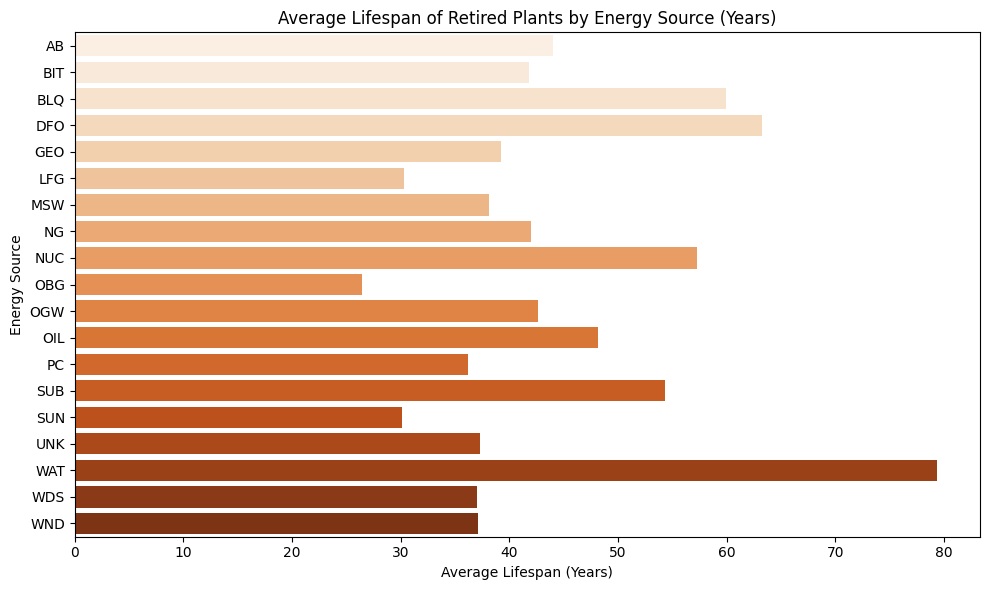

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Lifespan', y='PriEnergySource', hue='PriEnergySource', data=lifespan_by_energy, palette='Oranges', legend=False)
plt.title('Average Lifespan of Retired Plants by Energy Source (Years)')
plt.xlabel('Average Lifespan (Years)')
plt.ylabel('Energy Source')
plt.tight_layout()
plt.savefig('retired_lifespan.png')
plt.show()

In [63]:
renewable_sources = ['SUN', 'WAT', 'WND', 'GEO']
df['EnergyCategory'] = df['PriEnergySource'].apply(lambda x: 'Renewable' if x in renewable_sources else 'Non-Renewable')
capacity_by_category = df.groupby('EnergyCategory')['Capacity_Latest'].sum()
renewable_sources
df['EnergyCategory']
capacity_by_category

EnergyCategory
Non-Renewable    66174.31
Renewable        57101.54
Name: Capacity_Latest, dtype: float64

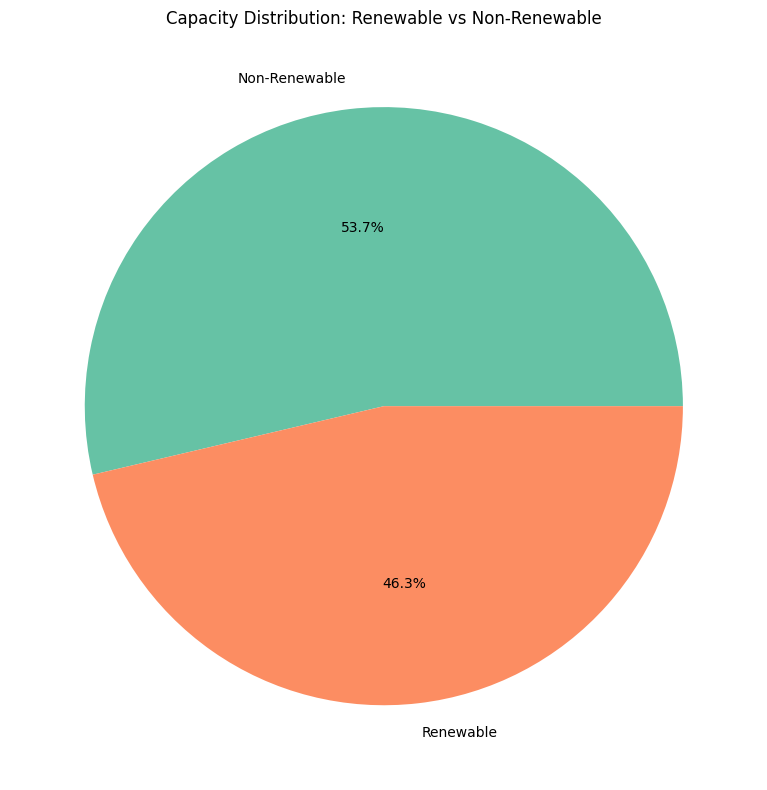

In [64]:
plt.figure(figsize=(8, 8))
plt.pie(capacity_by_category, labels=capacity_by_category.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Capacity Distribution: Renewable vs Non-Renewable')
plt.tight_layout()
plt.savefig('renewable_vs_nonrenewable.png')
plt.show()